In [12]:
"""
Check how well S&P 500 returns are log-normal distributed
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from os.path import exists

# Load data

In [100]:
data = pd.read_csv('SPX.csv', parse_dates = ['Date'], index_col = 0)

data['Pct_change'] = data['Adj Close'].pct_change()   # p2/p1 - 1
data['Log_change'] = np.log(1 + data['Pct_change'])    # Log(p2/p1)

print(data.head())

                 Open       High        Low      Close  Adj Close  Volume  \
Date                                                                        
1927-12-30  17.660000  17.660000  17.660000  17.660000  17.660000       0   
1928-01-03  17.760000  17.760000  17.760000  17.760000  17.760000       0   
1928-01-04  17.719999  17.719999  17.719999  17.719999  17.719999       0   
1928-01-05  17.549999  17.549999  17.549999  17.549999  17.549999       0   
1928-01-06  17.660000  17.660000  17.660000  17.660000  17.660000       0   

            Pct_change  Log_change  
Date                                
1927-12-30         NaN         NaN  
1928-01-03    0.005663    0.005647  
1928-01-04   -0.002252   -0.002255  
1928-01-05   -0.009594   -0.009640  
1928-01-06    0.006268    0.006248  


# Check if log price much different from percentual change

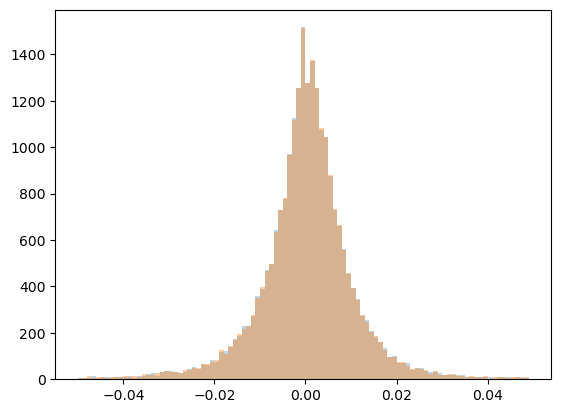

In [101]:
dx = 0.001
x = np.arange(-0.05, 0.05, dx)

# no big difference
plt.hist(data['Pct_change'], x, alpha = 0.3)
plt.hist(data['Log_change'], x, alpha = 0.4)
plt.show()

# Compare with Gaussian distribution with the same variance

mean, std 0.0002260922750360469 0.012021787137143348


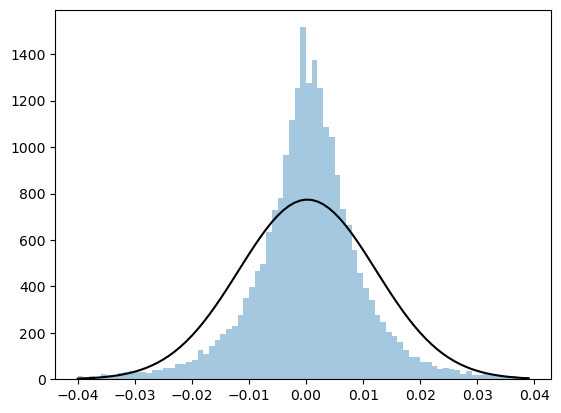

In [124]:
mean = data['Log_change'].mean()
std  = data['Log_change'].std()

print('mean, std', mean, std)

x = np.arange(-0.04, 0.04, dx)
plt.hist(data['Log_change'], x, alpha = 0.4)
norm = 1/np.sqrt(2*np.pi*std**2)*len(data)*dx
plt.plot(x, norm*np.exp(-(x - mean)**2/2/std**2), c = 'k')

We clearly see that the distribution is not Gaussian

mean, std 0.0003025979986146196 0.00968915729147127
min, max -0.22899728680392292 0.15366132332128526


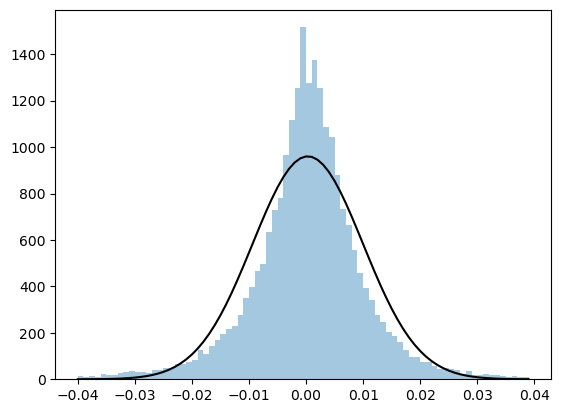

In [119]:
# statistics - cut everything outside of +- 0.04 to avoid the far tails
mean = data['Log_change'][abs(data['Log_change']) < 0.04].mean()
std  = data['Log_change'][abs(data['Log_change']) < 0.04].std()

print('mean, std', mean, std)
print('min, max', min(data['Log_change'][1:]), max(data['Log_change'][1:]))

x = np.arange(-0.04, 0.04, dx)
plt.hist(data['Log_change'], x, alpha = 0.4)
norm = 1/np.sqrt(2*np.pi*std**2)*len(data)*dx
plt.plot(x, norm*np.exp(-(x - mean)**2/2/std**2), c = 'k')

Still not very good

# What about longer periods of time?

mean, std 0.00045218455007209416 0.016628948129352592
min, max -0.18404718276142432 0.17112901636167618


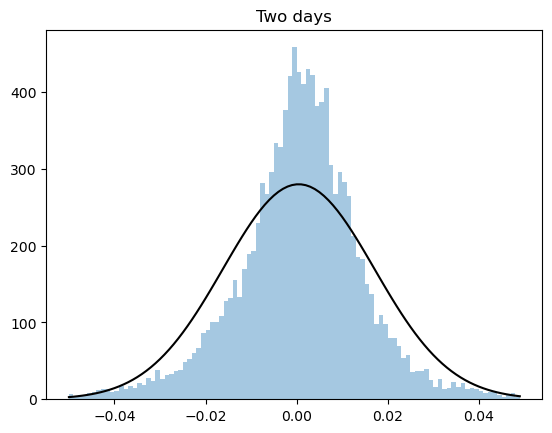

In [120]:
every_2d = data[::2].copy()
every_2d['Pct_change'] = every_2d['Adj Close'].pct_change()   # p2/p1 - 1
every_2d['Log_change'] = np.log(1 + every_2d['Pct_change'])    # Log(p2/p1)

# statistics
mean = every_2d['Log_change'].mean()
std  = every_2d['Log_change'].std()

print('mean, std', mean, std)
print('min, max', min(every_2d['Log_change'][1:]), max(every_2d['Log_change'][1:]))

x = np.arange(-0.05, 0.05, dx)
plt.hist(every_2d['Log_change'], x, alpha = 0.4)
norm = 1/np.sqrt(2*np.pi*std**2)*len(every_2d)*dx
plt.plot(x, norm*np.exp(-(x - mean)**2/2/std**2), c = 'k')
plt.title('Two days');

mean, std 0.0011220998660160149 0.026157324697021075
min, max -0.1945507253203666 0.20820430462717754


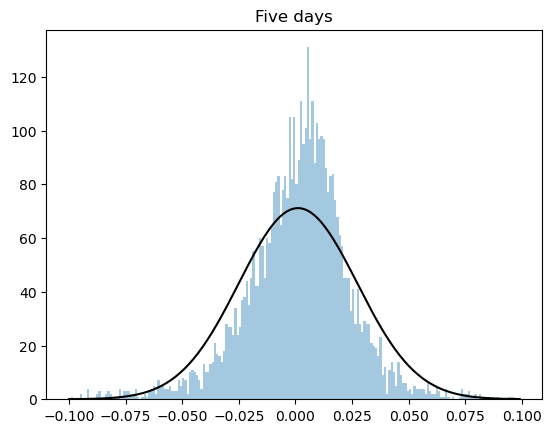

In [121]:
every_5d = data[::5].copy()
every_5d['Pct_change'] = every_5d['Adj Close'].pct_change()   # p2/p1 - 1
every_5d['Log_change'] = np.log(1 + every_5d['Pct_change'])    # Log(p2/p1)

# statistics
mean = every_5d['Log_change'].mean()
std  = every_5d['Log_change'].std()

print('mean, std', mean, std)
print('min, max', min(every_5d['Log_change'][1:]), max(every_5d['Log_change'][1:]))

x = np.arange(-0.10, 0.10, dx)
plt.hist(every_5d['Log_change'], x, alpha = 0.4)
norm = 1/np.sqrt(2*np.pi*std**2)*len(every_5d)*dx
plt.plot(x, norm*np.exp(-(x - mean)**2/2/std**2), c = 'k')
plt.title('Five days');

mean, std 0.0022441997320320284 0.036850516601604065
min, max -0.26882618228355815 0.27329333499968134


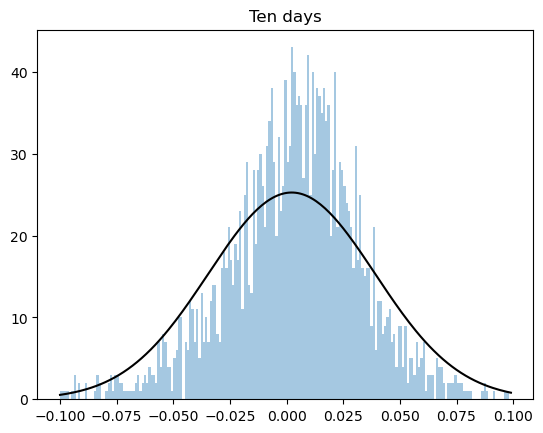

In [122]:
every_10d = data[::10].copy()
every_10d['Pct_change'] = every_10d['Adj Close'].pct_change()   # p2/p1 - 1
every_10d['Log_change'] = np.log(1 + every_10d['Pct_change'])    # Log(p2/p1)

# statistics
mean = every_10d['Log_change'].mean()
std  = every_10d['Log_change'].std()

print('mean, std', mean, std)
print('min, max', min(every_10d['Log_change'][1:]), max(every_10d['Log_change'][1:]))

x = np.arange(-0.10, 0.10, dx)
plt.hist(every_10d['Log_change'], x, alpha = 0.4)
norm = 1/np.sqrt(2*np.pi*std**2)*len(every_10d)*dx
plt.plot(x, norm*np.exp(-(x - mean)**2/2/std**2), c = 'k')
plt.title('Ten days');

mean, std 0.0023630011419945715 0.03781262858881362
min, max -0.26882618228355815 0.27329333499968134


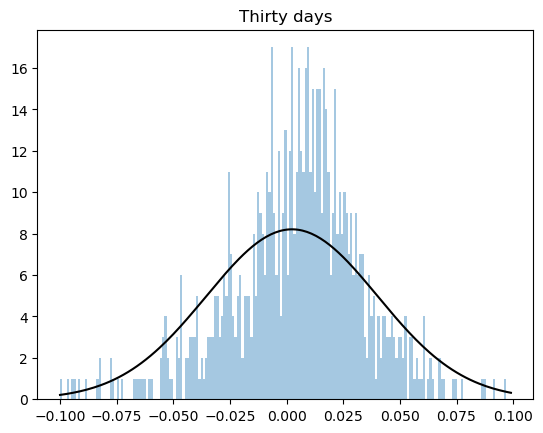

In [123]:
every_30d = data[::30].copy()
every_30d['Pct_change'] = every_30d['Adj Close'].pct_change()   # p2/p1 - 1
every_30d['Log_change'] = np.log(1 + every_10d['Pct_change'])    # Log(p2/p1)

# statistics
mean = every_30d['Log_change'].mean()
std  = every_30d['Log_change'].std()

print('mean, std', mean, std)
print('min, max', min(every_30d['Log_change'][1:]), max(every_10d['Log_change'][1:]))

x = np.arange(-0.10, 0.10, dx)
plt.hist(every_30d['Log_change'], x, alpha = 0.4)
norm = 1/np.sqrt(2*np.pi*std**2)*len(every_30d)*dx
plt.plot(x, norm*np.exp(-(x - mean)**2/2/std**2), c = 'k')
plt.title('Thirty days');